In [2]:
import numpy as np
from utils import *
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
ds_train = xr.open_dataset('datasets/train.nc')
ds_val = xr.open_dataset('datasets/val.nc')
ds_test = xr.open_dataset('datasets/test.nc')

/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


In [4]:
def dataset_to_dataloader(_ds, batch_size=1024, shuffle=False):
  X = torch.tensor(_ds['X'].values.astype('float32'))
  Y = torch.tensor(_ds['Xcouple'].values.astype('float32'))
  #https://stackoverflow.com/questions/44429199/how-to-load-a-list-of-numpy-arrays-to-pytorch-dataset-loader
  return DataLoader(TensorDataset(X,Y), batch_size=batch_size, shuffle=shuffle)

In [5]:
train_loader=dataset_to_dataloader(ds_train, shuffle=True)
val_loader=dataset_to_dataloader(ds_train)

In [6]:
ref = L96_XY()
coarse = L96_X()

In [7]:
gamma0 = L96_X.from_dataset(train_loader, val_loader, gamma=0, max_epochs=100)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/ext3/miniconda3/lib/python3.9/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:616: UserWarning: Checkpoint directory /home/pp2681/L96_predictability/lightning_logs/version_25954153/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name    | Type       | Params
---------------------------------------
0 | network | Sequential | 2.4 K 
---------------------------------------
2.4 K     Trainable params
0         Non-trainable params
2.4 K     Total params
0.010     Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

/ext3/miniconda3/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 48 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


/ext3/miniconda3/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 48 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/ext3/miniconda3/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1892: PossibleUserWarning: The number of training batches (49) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 0:  41%|████      | 40/98 [00:00<00:00, 72.83it/s, loss=8.73, v_num=2.6e+7, train_loss=6.590, train_MSE=6.590, train_S=-.012, train_F=-.0591] 
Validation: 0it [00:00, ?it/s]
Epoch 1:  41%|████      | 40/98 [00:00<00:00, 81.64it/s, loss=3.45, v_num=2.6e+7, train_loss=3.230, train_MSE=3.230, train_S=-.0126, train_F=-.012, val_loss=5.340, val_MSE=5.340, val_S=-.0114, val_F=-.0557]  
Validation: 0it [00:00, ?it/s]
Epoch 2:  41%|████      | 40/98 [00:00<00:00, 79.77it/s, loss=2.98, v_num=2.6e+7, train_loss=2.990, train_MSE=2.990, train_S=-.012, train_F=-.0119, val_loss=3.100, val_MSE=3.100, val_S=-.0124, val_F=-.00915]   
Validation: 0it [00:00, ?it/s]
Epoch 3:  41%|████      | 40/98 [00:00<00:00, 87.03it/s, loss=2.85, v_num=2.6e+7, train_loss=2.850, train_MSE=2.850, train_S=-.0111, train_F=-.00964, val_loss=2.910, val_MSE=2.910, val_S=-.0115, val_F=-.00996] 
Validation: 0it [00:00, ?it/s]
Epoch 4:  41%|████      | 40/98 [00:00<00:00, 85.58it/s, loss=2.72, v_num=2.6e+7, train_loss=2.6

Epoch 9:  41%|████      | 40/98 [00:00<00:00, 110.08it/s, loss=2.52, v_num=2.6e+7, train_loss=2.500, train_MSE=2.500, train_S=-.0092, train_F=-.00959, val_loss=2.540, val_MSE=2.540, val_S=-.00955, val_F=-.0108]
Validation: 0it [00:00, ?it/s]
Epoch 10:  41%|████      | 40/98 [00:00<00:00, 79.68it/s, loss=2.48, v_num=2.6e+7, train_loss=2.520, train_MSE=2.520, train_S=-.00948, train_F=-.0112, val_loss=2.470, val_MSE=2.470, val_S=-.00932, val_F=-.00994]  
Validation: 0it [00:00, ?it/s]
Epoch 11:  41%|████      | 40/98 [00:00<00:00, 90.53it/s, loss=2.44, v_num=2.6e+7, train_loss=2.510, train_MSE=2.510, train_S=-.00943, train_F=-.0106, val_loss=2.450, val_MSE=2.450, val_S=-.009, val_F=-.0101]  
Validation: 0it [00:00, ?it/s]
Epoch 12:  41%|████      | 40/98 [00:00<00:00, 89.34it/s, loss=2.44, v_num=2.6e+7, train_loss=2.480, train_MSE=2.480, train_S=-.00925, train_F=-.0095, val_loss=2.460, val_MSE=2.460, val_S=-.00905, val_F=-.0105]  
Validation: 0it [00:00, ?it/s]
Epoch 13:  41%|████      | 

Epoch 17:  41%|████      | 40/98 [00:00<00:00, 118.38it/s, loss=2.36, v_num=2.6e+7, train_loss=2.310, train_MSE=2.310, train_S=-.00818, train_F=-.0094, val_loss=2.350, val_MSE=2.350, val_S=-.00853, val_F=-.00994] 
Validation: 0it [00:00, ?it/s]
Epoch 18:  41%|████      | 40/98 [00:00<00:00, 85.92it/s, loss=2.33, v_num=2.6e+7, train_loss=2.420, train_MSE=2.420, train_S=-.0085, train_F=-.00814, val_loss=2.320, val_MSE=2.320, val_S=-.00835, val_F=-.0107]  
Validation: 0it [00:00, ?it/s]
Epoch 19:  41%|████      | 40/98 [00:00<00:00, 81.74it/s, loss=2.34, v_num=2.6e+7, train_loss=2.430, train_MSE=2.430, train_S=-.00829, train_F=-.0109, val_loss=2.330, val_MSE=2.330, val_S=-.0084, val_F=-.0105] 
Validation: 0it [00:00, ?it/s]
Epoch 20:  41%|████      | 40/98 [00:00<00:00, 85.62it/s, loss=2.31, v_num=2.6e+7, train_loss=2.320, train_MSE=2.320, train_S=-.00828, train_F=-.00963, val_loss=2.320, val_MSE=2.320, val_S=-.00839, val_F=-.00971] 
Validation: 0it [00:00, ?it/s]
Epoch 21:  41%|████     

Epoch 25:  41%|████      | 40/98 [00:02<00:03, 16.69it/s, loss=2.3, v_num=2.6e+7, train_loss=2.320, train_MSE=2.320, train_S=-.00798, train_F=-.0106, val_loss=2.270, val_MSE=2.270, val_S=-.00803, val_F=-.0106]  
Validation: 0it [00:00, ?it/s]
Epoch 26:  41%|████      | 40/98 [00:00<00:00, 89.08it/s, loss=2.26, v_num=2.6e+7, train_loss=2.240, train_MSE=2.240, train_S=-.00797, train_F=-.0104, val_loss=2.290, val_MSE=2.290, val_S=-.00808, val_F=-.0106]  
Validation: 0it [00:00, ?it/s]
Epoch 27:  41%|████      | 40/98 [00:00<00:00, 88.37it/s, loss=2.29, v_num=2.6e+7, train_loss=2.290, train_MSE=2.290, train_S=-.00819, train_F=-.0117, val_loss=2.280, val_MSE=2.280, val_S=-.00809, val_F=-.00965] 
Validation: 0it [00:00, ?it/s]
Epoch 28:  41%|████      | 40/98 [00:00<00:00, 82.41it/s, loss=2.26, v_num=2.6e+7, train_loss=2.310, train_MSE=2.310, train_S=-.00805, train_F=-.0104, val_loss=2.240, val_MSE=2.240, val_S=-.00776, val_F=-.0106] 
Validation: 0it [00:00, ?it/s]
Epoch 29:  41%|████      |

Epoch 33:  41%|████      | 40/98 [00:00<00:00, 113.38it/s, loss=2.22, v_num=2.6e+7, train_loss=2.270, train_MSE=2.270, train_S=-.00786, train_F=-.0107, val_loss=2.210, val_MSE=2.210, val_S=-.00764, val_F=-.010]
Validation: 0it [00:00, ?it/s]
Epoch 34:  41%|████      | 40/98 [00:00<00:00, 118.37it/s, loss=2.21, v_num=2.6e+7, train_loss=2.170, train_MSE=2.170, train_S=-.00749, train_F=-.0097, val_loss=2.210, val_MSE=2.210, val_S=-.00769, val_F=-.0105] 
Validation: 0it [00:00, ?it/s]
Epoch 35:  41%|████      | 40/98 [00:00<00:00, 84.41it/s, loss=2.24, v_num=2.6e+7, train_loss=2.230, train_MSE=2.230, train_S=-.00751, train_F=-.011, val_loss=2.210, val_MSE=2.210, val_S=-.00765, val_F=-.0104]  
Validation: 0it [00:00, ?it/s]
Epoch 36:  41%|████      | 40/98 [00:00<00:00, 90.00it/s, loss=2.22, v_num=2.6e+7, train_loss=2.260, train_MSE=2.260, train_S=-.00778, train_F=-.0125, val_loss=2.240, val_MSE=2.240, val_S=-.00791, val_F=-.0102] 
Validation: 0it [00:00, ?it/s]
Epoch 37:  41%|████      | 4

Epoch 41:  41%|████      | 40/98 [00:00<00:00, 102.67it/s, loss=2.2, v_num=2.6e+7, train_loss=2.250, train_MSE=2.250, train_S=-.00763, train_F=-.0111, val_loss=2.210, val_MSE=2.210, val_S=-.0077, val_F=-.0099] 
Validation: 0it [00:00, ?it/s]
Epoch 42:  41%|████      | 40/98 [00:00<00:00, 106.09it/s, loss=2.2, v_num=2.6e+7, train_loss=2.210, train_MSE=2.210, train_S=-.0075, train_F=-.00907, val_loss=2.200, val_MSE=2.200, val_S=-.0076, val_F=-.0112]  
Validation: 0it [00:00, ?it/s]
Epoch 43:  41%|████      | 40/98 [00:00<00:00, 88.03it/s, loss=2.19, v_num=2.6e+7, train_loss=2.150, train_MSE=2.150, train_S=-.00717, train_F=-.0111, val_loss=2.170, val_MSE=2.170, val_S=-.00744, val_F=-.0104] 
Validation: 0it [00:00, ?it/s]
Epoch 44:  41%|████      | 40/98 [00:00<00:00, 90.77it/s, loss=2.18, v_num=2.6e+7, train_loss=2.240, train_MSE=2.240, train_S=-.00764, train_F=-.0121, val_loss=2.180, val_MSE=2.180, val_S=-.00745, val_F=-.0101] 
Validation: 0it [00:00, ?it/s]
Epoch 45:  41%|████      | 40

Epoch 49:  41%|████      | 40/98 [00:00<00:00, 118.08it/s, loss=2.16, v_num=2.6e+7, train_loss=2.230, train_MSE=2.230, train_S=-.00759, train_F=-.00987, val_loss=2.150, val_MSE=2.150, val_S=-.00732, val_F=-.0102]
Validation: 0it [00:00, ?it/s]
Epoch 50:  41%|████      | 40/98 [00:02<00:03, 16.22it/s, loss=2.18, v_num=2.6e+7, train_loss=2.170, train_MSE=2.170, train_S=-.0073, train_F=-.00856, val_loss=2.140, val_MSE=2.140, val_S=-.00731, val_F=-.0106] 
Validation: 0it [00:00, ?it/s]
Epoch 51:  41%|████      | 40/98 [00:00<00:00, 107.58it/s, loss=2.16, v_num=2.6e+7, train_loss=2.170, train_MSE=2.170, train_S=-.0074, train_F=-.010, val_loss=2.210, val_MSE=2.210, val_S=-.00763, val_F=-.00968]   
Validation: 0it [00:00, ?it/s]
Epoch 52:  41%|████      | 40/98 [00:00<00:00, 86.11it/s, loss=2.13, v_num=2.6e+7, train_loss=2.120, train_MSE=2.120, train_S=-.00727, train_F=-.00873, val_loss=2.140, val_MSE=2.140, val_S=-.00727, val_F=-.0105] 
Validation: 0it [00:00, ?it/s]
Epoch 53:  41%|████     

Epoch 57:  41%|████      | 40/98 [00:00<00:00, 117.86it/s, loss=2.12, v_num=2.6e+7, train_loss=2.080, train_MSE=2.080, train_S=-.00706, train_F=-.0103, val_loss=2.120, val_MSE=2.120, val_S=-.00712, val_F=-.0103] 
Validation: 0it [00:00, ?it/s]
Epoch 58:  41%|████      | 40/98 [00:00<00:00, 116.81it/s, loss=2.14, v_num=2.6e+7, train_loss=2.160, train_MSE=2.160, train_S=-.00723, train_F=-.00987, val_loss=2.120, val_MSE=2.120, val_S=-.00716, val_F=-.0101]
Validation: 0it [00:00, ?it/s]
Epoch 59:  41%|████      | 40/98 [00:00<00:00, 118.30it/s, loss=2.15, v_num=2.6e+7, train_loss=2.190, train_MSE=2.190, train_S=-.00756, train_F=-.011, val_loss=2.130, val_MSE=2.130, val_S=-.00708, val_F=-.0104]  
Validation: 0it [00:00, ?it/s]
Epoch 60:  41%|████      | 40/98 [00:00<00:00, 90.73it/s, loss=2.12, v_num=2.6e+7, train_loss=2.160, train_MSE=2.160, train_S=-.00735, train_F=-.0104, val_loss=2.140, val_MSE=2.140, val_S=-.00726, val_F=-.011]  
Validation: 0it [00:00, ?it/s]
Epoch 61:  41%|████      

Epoch 65:  41%|████      | 40/98 [00:00<00:00, 119.45it/s, loss=2.11, v_num=2.6e+7, train_loss=2.070, train_MSE=2.070, train_S=-.007, train_F=-.0105, val_loss=2.130, val_MSE=2.130, val_S=-.00716, val_F=-.0102]   
Validation: 0it [00:00, ?it/s]
Epoch 66:  41%|████      | 40/98 [00:00<00:00, 119.13it/s, loss=2.13, v_num=2.6e+7, train_loss=2.140, train_MSE=2.140, train_S=-.00711, train_F=-.00979, val_loss=2.090, val_MSE=2.090, val_S=-.00698, val_F=-.0102]
Validation: 0it [00:00, ?it/s]
Epoch 67:  41%|████      | 40/98 [00:00<00:00, 91.96it/s, loss=2.11, v_num=2.6e+7, train_loss=2.030, train_MSE=2.030, train_S=-.00685, train_F=-.00965, val_loss=2.090, val_MSE=2.090, val_S=-.00695, val_F=-.00997]
Validation: 0it [00:00, ?it/s]
Epoch 68:  41%|████      | 40/98 [00:00<00:00, 91.82it/s, loss=2.11, v_num=2.6e+7, train_loss=2.120, train_MSE=2.120, train_S=-.0071, train_F=-.0113, val_loss=2.100, val_MSE=2.100, val_S=-.00692, val_F=-.010]  
Validation: 0it [00:00, ?it/s]
Epoch 69:  41%|████      |

Epoch 73:  41%|████      | 40/98 [00:00<00:00, 81.24it/s, loss=2.09, v_num=2.6e+7, train_loss=2.020, train_MSE=2.020, train_S=-.00661, train_F=-.00917, val_loss=2.120, val_MSE=2.120, val_S=-.00705, val_F=-.0107] 
Validation: 0it [00:00, ?it/s]
Epoch 74:  41%|████      | 40/98 [00:00<00:00, 116.21it/s, loss=2.09, v_num=2.6e+7, train_loss=2.120, train_MSE=2.120, train_S=-.00701, train_F=-.011, val_loss=2.090, val_MSE=2.090, val_S=-.00695, val_F=-.00981]  
Validation: 0it [00:00, ?it/s]
Epoch 75:  41%|████      | 40/98 [00:00<00:00, 118.80it/s, loss=2.08, v_num=2.6e+7, train_loss=2.120, train_MSE=2.120, train_S=-.00686, train_F=-.00937, val_loss=2.070, val_MSE=2.070, val_S=-.00681, val_F=-.0101]
Validation: 0it [00:00, ?it/s]
Epoch 76:  41%|████      | 40/98 [00:00<00:00, 90.89it/s, loss=2.09, v_num=2.6e+7, train_loss=2.030, train_MSE=2.030, train_S=-.00685, train_F=-.00909, val_loss=2.090, val_MSE=2.090, val_S=-.00693, val_F=-.010] 
Validation: 0it [00:00, ?it/s]
Epoch 77:  41%|████     

Epoch 81:  41%|████      | 40/98 [00:00<00:00, 118.90it/s, loss=2.09, v_num=2.6e+7, train_loss=2.090, train_MSE=2.090, train_S=-.00668, train_F=-.00888, val_loss=2.090, val_MSE=2.090, val_S=-.00688, val_F=-.0104]
Validation: 0it [00:00, ?it/s]
Epoch 82:  41%|████      | 40/98 [00:00<00:00, 118.09it/s, loss=2.09, v_num=2.6e+7, train_loss=2.140, train_MSE=2.140, train_S=-.00688, train_F=-.0102, val_loss=2.080, val_MSE=2.080, val_S=-.00692, val_F=-.0109] 
Validation: 0it [00:00, ?it/s]
Epoch 83:  41%|████      | 40/98 [00:00<00:00, 120.13it/s, loss=2.09, v_num=2.6e+7, train_loss=2.090, train_MSE=2.090, train_S=-.00692, train_F=-.00867, val_loss=2.090, val_MSE=2.090, val_S=-.00691, val_F=-.00958]
Validation: 0it [00:00, ?it/s]
Epoch 84:  41%|████      | 40/98 [00:00<00:00, 78.94it/s, loss=2.08, v_num=2.6e+7, train_loss=2.120, train_MSE=2.120, train_S=-.00707, train_F=-.00984, val_loss=2.080, val_MSE=2.080, val_S=-.00683, val_F=-.00956] 
Validation: 0it [00:00, ?it/s]
Epoch 85:  41%|████   

Epoch 89:  41%|████      | 40/98 [00:00<00:00, 103.46it/s, loss=2.06, v_num=2.6e+7, train_loss=2.090, train_MSE=2.090, train_S=-.00666, train_F=-.0106, val_loss=2.080, val_MSE=2.080, val_S=-.00673, val_F=-.00932] 
Validation: 0it [00:00, ?it/s]
Epoch 90:  41%|████      | 40/98 [00:00<00:00, 115.26it/s, loss=2.07, v_num=2.6e+7, train_loss=2.090, train_MSE=2.090, train_S=-.0069, train_F=-.0103, val_loss=2.070, val_MSE=2.070, val_S=-.00666, val_F=-.0094]  
Validation: 0it [00:00, ?it/s]
Epoch 91:  41%|████      | 40/98 [00:00<00:00, 120.13it/s, loss=2.07, v_num=2.6e+7, train_loss=2.120, train_MSE=2.120, train_S=-.00681, train_F=-.0091, val_loss=2.070, val_MSE=2.070, val_S=-.00665, val_F=-.010] 
Validation: 0it [00:00, ?it/s]
Epoch 92:  41%|████      | 40/98 [00:00<00:00, 83.66it/s, loss=2.05, v_num=2.6e+7, train_loss=2.020, train_MSE=2.020, train_S=-.00674, train_F=-.0101, val_loss=2.040, val_MSE=2.040, val_S=-.00657, val_F=-.00966] 
Validation: 0it [00:00, ?it/s]
Epoch 93:  41%|████     

Epoch 97:  41%|████      | 40/98 [00:00<00:00, 113.13it/s, loss=2.06, v_num=2.6e+7, train_loss=2.010, train_MSE=2.010, train_S=-.00639, train_F=-.0103, val_loss=2.030, val_MSE=2.030, val_S=-.00663, val_F=-.00949] 
Validation: 0it [00:00, ?it/s]
Epoch 98:  41%|████      | 40/98 [00:00<00:00, 119.57it/s, loss=2.06, v_num=2.6e+7, train_loss=2.110, train_MSE=2.110, train_S=-.00668, train_F=-.0106, val_loss=2.060, val_MSE=2.060, val_S=-.00668, val_F=-.00966] 
Validation: 0it [00:00, ?it/s]
Epoch 99:  41%|████      | 40/98 [00:00<00:00, 118.99it/s, loss=2.08, v_num=2.6e+7, train_loss=2.060, train_MSE=2.060, train_S=-.00669, train_F=-.00885, val_loss=2.070, val_MSE=2.070, val_S=-.00682, val_F=-.0106]
Validation: 0it [00:00, ?it/s]
Epoch 99: 100%|██████████| 98/98 [00:00<00:00, 119.70it/s, loss=2.05, v_num=2.6e+7, train_loss=2.030, train_MSE=2.030, train_S=-.00638, train_F=-.0105, val_loss=2.070, val_MSE=2.070, val_S=-.00671, val_F=-.00956]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 98/98 [00:00<00:00, 119.16it/s, loss=2.05, v_num=2.6e+7, train_loss=2.030, train_MSE=2.030, train_S=-.00638, train_F=-.0105, val_loss=2.070, val_MSE=2.070, val_S=-.00671, val_F=-.00956]


In [8]:
gamma1 = L96_X.from_dataset(train_loader, val_loader, gamma=1, max_epochs=100)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type       | Params
---------------------------------------
0 | network | Sequential | 2.4 K 
---------------------------------------
2.4 K     Trainable params
0         Non-trainable params
2.4 K     Total params
0.010     Total estimated model params size (MB)


Epoch 0:  41%|████      | 40/98 [00:00<00:00, 62.20it/s, loss=7.85, v_num=2.6e+7, train_loss=6.530, train_MSE=6.590, train_S=-.0107, train_F=-.0665]
Validation: 0it [00:00, ?it/s]
Epoch 1:  41%|████      | 40/98 [00:00<00:00, 90.69it/s, loss=3.72, v_num=2.6e+7, train_loss=3.390, train_MSE=3.400, train_S=-.0131, train_F=-.0143, val_loss=5.440, val_MSE=5.500, val_S=-.0118, val_F=-.0539]
Validation: 0it [00:00, ?it/s]
Epoch 2:  41%|████      | 40/98 [00:00<00:00, 92.22it/s, loss=3, v_num=2.6e+7, train_loss=2.920, train_MSE=2.920, train_S=-.0116, train_F=-.00717, val_loss=3.210, val_MSE=3.220, val_S=-.0126, val_F=-.0121]   
Validation: 0it [00:00, ?it/s]
Epoch 3:  41%|████      | 40/98 [00:00<00:00, 107.10it/s, loss=2.86, v_num=2.6e+7, train_loss=2.790, train_MSE=2.810, train_S=-.011, train_F=-.0103, val_loss=2.950, val_MSE=2.960, val_S=-.0117, val_F=-.00955]  
Validation: 0it [00:00, ?it/s]
Epoch 4:  41%|████      | 40/98 [00:00<00:00, 113.47it/s, loss=2.73, v_num=2.6e+7, train_loss=2.710

Epoch 9:  41%|████      | 40/98 [00:00<00:01, 55.81it/s, loss=2.46, v_num=2.6e+7, train_loss=2.360, train_MSE=2.370, train_S=-.00886, train_F=-.00882, val_loss=2.480, val_MSE=2.490, val_S=-.00944, val_F=-.00932]
Validation: 0it [00:00, ?it/s]
Epoch 10:  41%|████      | 40/98 [00:00<00:00, 78.09it/s, loss=2.45, v_num=2.6e+7, train_loss=2.380, train_MSE=2.390, train_S=-.009, train_F=-.00953, val_loss=2.420, val_MSE=2.430, val_S=-.00911, val_F=-.00961]  
Validation: 0it [00:00, ?it/s]
Epoch 11:  41%|████      | 40/98 [00:00<00:00, 85.13it/s, loss=2.41, v_num=2.6e+7, train_loss=2.440, train_MSE=2.450, train_S=-.00922, train_F=-.00974, val_loss=2.400, val_MSE=2.410, val_S=-.00893, val_F=-.00972]
Validation: 0it [00:00, ?it/s]
Epoch 12:  41%|████      | 40/98 [00:00<00:00, 85.85it/s, loss=2.38, v_num=2.6e+7, train_loss=2.360, train_MSE=2.370, train_S=-.00892, train_F=-.0108, val_loss=2.400, val_MSE=2.420, val_S=-.009, val_F=-.0102] 
Validation: 0it [00:00, ?it/s]
Epoch 13:  41%|████      | 4

Epoch 17:  41%|████      | 40/98 [00:00<00:00, 74.65it/s, loss=2.3, v_num=2.6e+7, train_loss=2.260, train_MSE=2.270, train_S=-.00842, train_F=-.0101, val_loss=2.300, val_MSE=2.310, val_S=-.00845, val_F=-.0102]  
Validation: 0it [00:00, ?it/s]
Epoch 18:  41%|████      | 40/98 [00:00<00:00, 73.43it/s, loss=2.28, v_num=2.6e+7, train_loss=2.230, train_MSE=2.240, train_S=-.00825, train_F=-.00946, val_loss=2.280, val_MSE=2.290, val_S=-.00832, val_F=-.00985]
Validation: 0it [00:00, ?it/s]
Epoch 19:  41%|████      | 40/98 [00:00<00:00, 77.63it/s, loss=2.27, v_num=2.6e+7, train_loss=2.200, train_MSE=2.210, train_S=-.00801, train_F=-.00866, val_loss=2.260, val_MSE=2.270, val_S=-.00822, val_F=-.00946] 
Validation: 0it [00:00, ?it/s]
Epoch 20:  41%|████      | 40/98 [00:00<00:00, 118.59it/s, loss=2.29, v_num=2.6e+7, train_loss=2.270, train_MSE=2.280, train_S=-.00823, train_F=-.00941, val_loss=2.290, val_MSE=2.300, val_S=-.00832, val_F=-.0103]
Validation: 0it [00:00, ?it/s]
Epoch 21:  41%|████     

Epoch 25:  41%|████      | 40/98 [00:00<00:00, 85.29it/s, loss=2.22, v_num=2.6e+7, train_loss=2.260, train_MSE=2.270, train_S=-.00814, train_F=-.0101, val_loss=2.220, val_MSE=2.230, val_S=-.00794, val_F=-.00925] 
Validation: 0it [00:00, ?it/s]
Epoch 26:  41%|████      | 40/98 [00:00<00:00, 85.11it/s, loss=2.21, v_num=2.6e+7, train_loss=2.200, train_MSE=2.220, train_S=-.00789, train_F=-.0127, val_loss=2.240, val_MSE=2.250, val_S=-.00798, val_F=-.00939]  
Validation: 0it [00:00, ?it/s]
Epoch 27:  41%|████      | 40/98 [00:00<00:00, 103.34it/s, loss=2.2, v_num=2.6e+7, train_loss=2.220, train_MSE=2.230, train_S=-.00801, train_F=-.0104, val_loss=2.210, val_MSE=2.220, val_S=-.0078, val_F=-.00963] 
Validation: 0it [00:00, ?it/s]
Epoch 28:  41%|████      | 40/98 [00:00<00:00, 91.62it/s, loss=2.19, v_num=2.6e+7, train_loss=2.190, train_MSE=2.200, train_S=-.0079, train_F=-.0101, val_loss=2.180, val_MSE=2.190, val_S=-.00773, val_F=-.00943]  
Validation: 0it [00:00, ?it/s]
Epoch 29:  41%|████     

Epoch 33:  41%|████      | 40/98 [00:00<00:01, 44.41it/s, loss=2.17, v_num=2.6e+7, train_loss=2.150, train_MSE=2.150, train_S=-.00741, train_F=-.00842, val_loss=2.170, val_MSE=2.180, val_S=-.00753, val_F=-.00927]
Validation: 0it [00:00, ?it/s]
Epoch 34:  41%|████      | 40/98 [00:00<00:00, 87.64it/s, loss=2.15, v_num=2.6e+7, train_loss=2.160, train_MSE=2.170, train_S=-.0074, train_F=-.0103, val_loss=2.190, val_MSE=2.190, val_S=-.0077, val_F=-.00945]  
Validation: 0it [00:00, ?it/s]
Epoch 35:  41%|████      | 40/98 [00:00<00:00, 83.26it/s, loss=2.15, v_num=2.6e+7, train_loss=2.210, train_MSE=2.220, train_S=-.00762, train_F=-.00903, val_loss=2.150, val_MSE=2.160, val_S=-.0075, val_F=-.00965]
Validation: 0it [00:00, ?it/s]
Epoch 36:  41%|████      | 40/98 [00:00<00:00, 118.88it/s, loss=2.17, v_num=2.6e+7, train_loss=2.070, train_MSE=2.080, train_S=-.00732, train_F=-.0121, val_loss=2.140, val_MSE=2.150, val_S=-.00735, val_F=-.00995] 
Validation: 0it [00:00, ?it/s]
Epoch 37:  41%|████      

Epoch 41:  41%|████      | 40/98 [00:00<00:00, 76.40it/s, loss=2.12, v_num=2.6e+7, train_loss=2.120, train_MSE=2.130, train_S=-.00729, train_F=-.0101, val_loss=2.150, val_MSE=2.170, val_S=-.0075, val_F=-.0108]
Validation: 0it [00:00, ?it/s]
Epoch 42:  41%|████      | 40/98 [00:00<00:00, 81.46it/s, loss=2.16, v_num=2.6e+7, train_loss=2.140, train_MSE=2.150, train_S=-.00732, train_F=-.0115, val_loss=2.110, val_MSE=2.120, val_S=-.0072, val_F=-.00971] 
Validation: 0it [00:00, ?it/s]
Epoch 43:  41%|████      | 40/98 [00:01<00:01, 29.08it/s, loss=2.12, v_num=2.6e+7, train_loss=2.160, train_MSE=2.170, train_S=-.00733, train_F=-.00884, val_loss=2.100, val_MSE=2.110, val_S=-.00717, val_F=-.00991]
Validation: 0it [00:00, ?it/s]
Epoch 44:  41%|████      | 40/98 [00:00<00:00, 86.89it/s, loss=2.11, v_num=2.6e+7, train_loss=2.070, train_MSE=2.080, train_S=-.00705, train_F=-.0105, val_loss=2.100, val_MSE=2.110, val_S=-.0072, val_F=-.010] 
Validation: 0it [00:00, ?it/s]
Epoch 45:  41%|████      | 40/9

Epoch 49:  41%|████      | 40/98 [00:00<00:00, 76.83it/s, loss=2.11, v_num=2.6e+7, train_loss=2.160, train_MSE=2.170, train_S=-.00713, train_F=-.0105, val_loss=2.110, val_MSE=2.120, val_S=-.00719, val_F=-.0103] 
Validation: 0it [00:00, ?it/s]
Epoch 50:  41%|████      | 40/98 [00:00<00:00, 89.39it/s, loss=2.12, v_num=2.6e+7, train_loss=2.060, train_MSE=2.070, train_S=-.00672, train_F=-.0101, val_loss=2.100, val_MSE=2.110, val_S=-.00708, val_F=-.00944] 
Validation: 0it [00:00, ?it/s]
Epoch 51:  41%|████      | 40/98 [00:00<00:00, 86.31it/s, loss=2.08, v_num=2.6e+7, train_loss=2.040, train_MSE=2.050, train_S=-.00678, train_F=-.0102, val_loss=2.090, val_MSE=2.100, val_S=-.00702, val_F=-.0107] 
Validation: 0it [00:00, ?it/s]
Epoch 52:  41%|████      | 40/98 [00:00<00:00, 68.15it/s, loss=2.1, v_num=2.6e+7, train_loss=2.140, train_MSE=2.150, train_S=-.00734, train_F=-.0106, val_loss=2.090, val_MSE=2.100, val_S=-.00698, val_F=-.00969] 
Validation: 0it [00:00, ?it/s]
Epoch 53:  41%|████      | 

Epoch 57:  41%|████      | 40/98 [00:00<00:00, 86.95it/s, loss=2.11, v_num=2.6e+7, train_loss=2.050, train_MSE=2.060, train_S=-.00665, train_F=-.00849, val_loss=2.050, val_MSE=2.060, val_S=-.00676, val_F=-.010] 
Validation: 0it [00:00, ?it/s]
Epoch 58:  41%|████      | 40/98 [00:00<00:00, 77.66it/s, loss=2.08, v_num=2.6e+7, train_loss=2.090, train_MSE=2.100, train_S=-.00684, train_F=-.0102, val_loss=2.080, val_MSE=2.090, val_S=-.00693, val_F=-.00965]  
Validation: 0it [00:00, ?it/s]
Epoch 59:  41%|████      | 40/98 [00:00<00:00, 91.73it/s, loss=2.06, v_num=2.6e+7, train_loss=2.070, train_MSE=2.090, train_S=-.00684, train_F=-.011, val_loss=2.050, val_MSE=2.060, val_S=-.00672, val_F=-.00975]   
Validation: 0it [00:00, ?it/s]
Epoch 60:  41%|████      | 40/98 [00:00<00:00, 65.62it/s, loss=2.07, v_num=2.6e+7, train_loss=2.040, train_MSE=2.050, train_S=-.00666, train_F=-.0106, val_loss=2.060, val_MSE=2.070, val_S=-.00681, val_F=-.00988] 
Validation: 0it [00:00, ?it/s]
Epoch 61:  41%|████    

Epoch 65:  41%|████      | 40/98 [00:00<00:00, 87.39it/s, loss=2.06, v_num=2.6e+7, train_loss=2.080, train_MSE=2.090, train_S=-.00671, train_F=-.00986, val_loss=2.040, val_MSE=2.050, val_S=-.00665, val_F=-.00981] 
Validation: 0it [00:00, ?it/s]
Epoch 66:  41%|████      | 40/98 [00:00<00:00, 82.85it/s, loss=2.04, v_num=2.6e+7, train_loss=2.120, train_MSE=2.130, train_S=-.00693, train_F=-.0104, val_loss=2.040, val_MSE=2.050, val_S=-.0066, val_F=-.00998]
Validation: 0it [00:00, ?it/s]
Epoch 67:  41%|████      | 40/98 [00:00<00:00, 86.49it/s, loss=2.05, v_num=2.6e+7, train_loss=2.010, train_MSE=2.020, train_S=-.0065, train_F=-.00963, val_loss=2.070, val_MSE=2.080, val_S=-.00688, val_F=-.00978]  
Validation: 0it [00:00, ?it/s]
Epoch 68:  41%|████      | 40/98 [00:00<00:00, 91.17it/s, loss=2.06, v_num=2.6e+7, train_loss=2.080, train_MSE=2.090, train_S=-.00687, train_F=-.0101, val_loss=2.060, val_MSE=2.070, val_S=-.00661, val_F=-.00971]  
Validation: 0it [00:00, ?it/s]
Epoch 69:  41%|████    

Epoch 73:  41%|████      | 40/98 [00:00<00:00, 79.74it/s, loss=2.03, v_num=2.6e+7, train_loss=2.030, train_MSE=2.040, train_S=-.00656, train_F=-.00914, val_loss=2.080, val_MSE=2.090, val_S=-.0067, val_F=-.0101] 
Validation: 0it [00:00, ?it/s]
Epoch 74:  41%|████      | 40/98 [00:00<00:00, 78.62it/s, loss=2.04, v_num=2.6e+7, train_loss=2.010, train_MSE=2.020, train_S=-.00657, train_F=-.00914, val_loss=2.030, val_MSE=2.040, val_S=-.0064, val_F=-.00972]
Validation: 0it [00:00, ?it/s]
Epoch 75:  41%|████      | 40/98 [00:00<00:00, 80.81it/s, loss=2.04, v_num=2.6e+7, train_loss=2.070, train_MSE=2.080, train_S=-.00652, train_F=-.0102, val_loss=2.020, val_MSE=2.030, val_S=-.00645, val_F=-.00964]  
Validation: 0it [00:00, ?it/s]
Epoch 76:  41%|████      | 40/98 [00:00<00:00, 81.54it/s, loss=2.04, v_num=2.6e+7, train_loss=2.060, train_MSE=2.070, train_S=-.00651, train_F=-.0108, val_loss=2.040, val_MSE=2.050, val_S=-.0066, val_F=-.00936] 
Validation: 0it [00:00, ?it/s]
Epoch 77:  41%|████      |

Epoch 81:  41%|████      | 40/98 [00:00<00:00, 81.75it/s, loss=2.06, v_num=2.6e+7, train_loss=2.030, train_MSE=2.040, train_S=-.00653, train_F=-.00862, val_loss=2.040, val_MSE=2.050, val_S=-.00655, val_F=-.00943] 
Validation: 0it [00:00, ?it/s]
Epoch 82:  41%|████      | 40/98 [00:01<00:02, 24.72it/s, loss=2.01, v_num=2.6e+7, train_loss=2.020, train_MSE=2.030, train_S=-.00658, train_F=-.00944, val_loss=2.020, val_MSE=2.030, val_S=-.00647, val_F=-.010] 
Validation: 0it [00:00, ?it/s]
Epoch 83:  41%|████      | 40/98 [00:00<00:00, 81.99it/s, loss=2.03, v_num=2.6e+7, train_loss=1.990, train_MSE=2.000, train_S=-.00618, train_F=-.0104, val_loss=2.030, val_MSE=2.040, val_S=-.00643, val_F=-.00977] 
Validation: 0it [00:00, ?it/s]
Epoch 84:  41%|████      | 40/98 [00:00<00:00, 84.45it/s, loss=2.02, v_num=2.6e+7, train_loss=2.040, train_MSE=2.050, train_S=-.00647, train_F=-.0109, val_loss=2.040, val_MSE=2.050, val_S=-.00652, val_F=-.010] 
Validation: 0it [00:00, ?it/s]
Epoch 85:  41%|████      |

Epoch 89:  41%|████      | 40/98 [00:00<00:00, 111.04it/s, loss=2.02, v_num=2.6e+7, train_loss=2.040, train_MSE=2.040, train_S=-.00619, train_F=-.00865, val_loss=2.040, val_MSE=2.050, val_S=-.00658, val_F=-.00984]
Validation: 0it [00:00, ?it/s]
Epoch 90:  41%|████      | 40/98 [00:00<00:00, 87.84it/s, loss=2.02, v_num=2.6e+7, train_loss=2.040, train_MSE=2.060, train_S=-.00644, train_F=-.011, val_loss=2.050, val_MSE=2.060, val_S=-.00646, val_F=-.00963]  
Validation: 0it [00:00, ?it/s]
Epoch 91:  41%|████      | 40/98 [00:00<00:00, 83.08it/s, loss=2.02, v_num=2.6e+7, train_loss=2.070, train_MSE=2.080, train_S=-.00645, train_F=-.010, val_loss=2.020, val_MSE=2.030, val_S=-.00633, val_F=-.010]   
Validation: 0it [00:00, ?it/s]
Epoch 92:  41%|████      | 40/98 [00:00<00:00, 81.60it/s, loss=2.01, v_num=2.6e+7, train_loss=2.020, train_MSE=2.020, train_S=-.00627, train_F=-.00872, val_loss=2.010, val_MSE=2.020, val_S=-.00635, val_F=-.00985]
Validation: 0it [00:00, ?it/s]
Epoch 93:  41%|████     

Epoch 97:  41%|████      | 40/98 [00:00<00:00, 115.42it/s, loss=2.01, v_num=2.6e+7, train_loss=1.970, train_MSE=1.980, train_S=-.00626, train_F=-.00983, val_loss=1.990, val_MSE=2.000, val_S=-.00617, val_F=-.00951]
Validation: 0it [00:00, ?it/s]
Epoch 98:  41%|████      | 40/98 [00:00<00:00, 90.78it/s, loss=2, v_num=2.6e+7, train_loss=2.040, train_MSE=2.050, train_S=-.00668, train_F=-.011, val_loss=2.020, val_MSE=2.030, val_S=-.00637, val_F=-.0102]      
Validation: 0it [00:00, ?it/s]
Epoch 99:  41%|████      | 40/98 [00:00<00:00, 90.99it/s, loss=2.03, v_num=2.6e+7, train_loss=2.130, train_MSE=2.140, train_S=-.00709, train_F=-.0105, val_loss=2.090, val_MSE=2.100, val_S=-.0066, val_F=-.011]  
Validation: 0it [00:00, ?it/s]
Epoch 99: 100%|██████████| 98/98 [00:00<00:00, 118.92it/s, loss=2.03, v_num=2.6e+7, train_loss=2.000, train_MSE=2.010, train_S=-.00604, train_F=-.00943, val_loss=1.990, val_MSE=2.000, val_S=-.00623, val_F=-.00972]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 98/98 [00:00<00:00, 118.33it/s, loss=2.03, v_num=2.6e+7, train_loss=2.000, train_MSE=2.010, train_S=-.00604, train_F=-.00943, val_loss=1.990, val_MSE=2.000, val_S=-.00623, val_F=-.00972]


In [9]:
gamma10 = L96_X.from_dataset(train_loader, val_loader, gamma=10, max_epochs=100)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type       | Params
---------------------------------------
0 | network | Sequential | 2.4 K 
---------------------------------------
2.4 K     Trainable params
0         Non-trainable params
2.4 K     Total params
0.010     Total estimated model params size (MB)


Epoch 0:  41%|████      | 40/98 [00:00<00:00, 68.12it/s, loss=7.08, v_num=2.6e+7, train_loss=5.650, train_MSE=6.380, train_S=-.012, train_F=-.0724] 
Validation: 0it [00:00, ?it/s]
Epoch 1:  41%|████      | 40/98 [00:00<00:00, 117.95it/s, loss=3.4, v_num=2.6e+7, train_loss=3.270, train_MSE=3.550, train_S=-.0122, train_F=-.0278, val_loss=4.680, val_MSE=5.250, val_S=-.0113, val_F=-.057] 
Validation: 0it [00:00, ?it/s]
Epoch 2:  41%|████      | 40/98 [00:00<00:00, 118.96it/s, loss=2.94, v_num=2.6e+7, train_loss=2.940, train_MSE=3.100, train_S=-.0115, train_F=-.0166, val_loss=3.170, val_MSE=3.410, val_S=-.012, val_F=-.0236]
Validation: 0it [00:00, ?it/s]
Epoch 3:  41%|████      | 40/98 [00:00<00:00, 118.89it/s, loss=2.79, v_num=2.6e+7, train_loss=2.800, train_MSE=2.950, train_S=-.0113, train_F=-.015, val_loss=2.880, val_MSE=3.050, val_S=-.0114, val_F=-.0169] 
Validation: 0it [00:00, ?it/s]
Epoch 4:  41%|████      | 40/98 [00:00<00:00, 119.20it/s, loss=2.72, v_num=2.6e+7, train_loss=2.760, t

Epoch 9:  41%|████      | 40/98 [00:00<00:00, 103.65it/s, loss=2.4, v_num=2.6e+7, train_loss=2.370, train_MSE=2.520, train_S=-.00947, train_F=-.0148, val_loss=2.440, val_MSE=2.580, val_S=-.00971, val_F=-.0138] 
Validation: 0it [00:00, ?it/s]
Epoch 10:  41%|████      | 40/98 [00:00<00:00, 87.25it/s, loss=2.34, v_num=2.6e+7, train_loss=2.300, train_MSE=2.460, train_S=-.00909, train_F=-.0159, val_loss=2.380, val_MSE=2.530, val_S=-.00941, val_F=-.0148]
Validation: 0it [00:00, ?it/s]
Epoch 11:  41%|████      | 40/98 [00:00<00:00, 118.39it/s, loss=2.32, v_num=2.6e+7, train_loss=2.320, train_MSE=2.470, train_S=-.0091, train_F=-.0147, val_loss=2.340, val_MSE=2.480, val_S=-.00918, val_F=-.0141] 
Validation: 0it [00:00, ?it/s]
Epoch 12:  41%|████      | 40/98 [00:00<00:00, 93.72it/s, loss=2.26, v_num=2.6e+7, train_loss=2.260, train_MSE=2.400, train_S=-.00889, train_F=-.014, val_loss=2.290, val_MSE=2.430, val_S=-.00896, val_F=-.0134]
Validation: 0it [00:00, ?it/s]
Epoch 13:  41%|████      | 40/98

Epoch 17:  41%|████      | 40/98 [00:00<00:00, 59.34it/s, loss=2.23, v_num=2.6e+7, train_loss=2.230, train_MSE=2.360, train_S=-.00863, train_F=-.0129, val_loss=2.220, val_MSE=2.360, val_S=-.00848, val_F=-.0135]
Validation: 0it [00:00, ?it/s]
Epoch 18:  41%|████      | 40/98 [00:00<00:00, 109.59it/s, loss=2.23, v_num=2.6e+7, train_loss=2.200, train_MSE=2.320, train_S=-.00833, train_F=-.012, val_loss=2.210, val_MSE=2.350, val_S=-.00841, val_F=-.0133] 
Validation: 0it [00:00, ?it/s]
Epoch 19:  41%|████      | 40/98 [00:00<00:00, 120.42it/s, loss=2.2, v_num=2.6e+7, train_loss=2.190, train_MSE=2.340, train_S=-.00826, train_F=-.015, val_loss=2.210, val_MSE=2.350, val_S=-.00849, val_F=-.0135]  
Validation: 0it [00:00, ?it/s]
Epoch 20:  41%|████      | 40/98 [00:00<00:00, 116.74it/s, loss=2.19, v_num=2.6e+7, train_loss=2.290, train_MSE=2.430, train_S=-.00862, train_F=-.0139, val_loss=2.190, val_MSE=2.330, val_S=-.00837, val_F=-.0138]
Validation: 0it [00:00, ?it/s]
Epoch 21:  41%|████      | 40

Epoch 25:  41%|████      | 40/98 [00:00<00:00, 78.96it/s, loss=2.16, v_num=2.6e+7, train_loss=2.190, train_MSE=2.310, train_S=-.00832, train_F=-.012, val_loss=2.140, val_MSE=2.270, val_S=-.00808, val_F=-.0133]  
Validation: 0it [00:00, ?it/s]
Epoch 26:  41%|████      | 40/98 [00:00<00:00, 118.41it/s, loss=2.15, v_num=2.6e+7, train_loss=2.190, train_MSE=2.300, train_S=-.00825, train_F=-.011, val_loss=2.140, val_MSE=2.270, val_S=-.00803, val_F=-.0125] 
Validation: 0it [00:00, ?it/s]
Epoch 27:  41%|████      | 40/98 [00:00<00:00, 100.93it/s, loss=2.16, v_num=2.6e+7, train_loss=2.140, train_MSE=2.270, train_S=-.00803, train_F=-.0133, val_loss=2.150, val_MSE=2.280, val_S=-.0082, val_F=-.0128]
Validation: 0it [00:00, ?it/s]
Epoch 28:  41%|████      | 40/98 [00:00<00:00, 99.17it/s, loss=2.15, v_num=2.6e+7, train_loss=2.110, train_MSE=2.230, train_S=-.00774, train_F=-.0129, val_loss=2.120, val_MSE=2.250, val_S=-.00795, val_F=-.0129] 
Validation: 0it [00:00, ?it/s]
Epoch 29:  41%|████      | 40

Epoch 33:  41%|████      | 40/98 [00:00<00:00, 61.07it/s, loss=2.12, v_num=2.6e+7, train_loss=2.100, train_MSE=2.250, train_S=-.00803, train_F=-.0148, val_loss=2.090, val_MSE=2.220, val_S=-.00779, val_F=-.0128] 
Validation: 0it [00:00, ?it/s]
Epoch 34:  41%|████      | 40/98 [00:00<00:00, 94.21it/s, loss=2.1, v_num=2.6e+7, train_loss=2.050, train_MSE=2.180, train_S=-.00769, train_F=-.0129, val_loss=2.100, val_MSE=2.220, val_S=-.00783, val_F=-.0123]  
Validation: 0it [00:00, ?it/s]
Epoch 35:  41%|████      | 40/98 [00:00<00:00, 117.74it/s, loss=2.12, v_num=2.6e+7, train_loss=2.070, train_MSE=2.180, train_S=-.00776, train_F=-.0116, val_loss=2.110, val_MSE=2.230, val_S=-.00784, val_F=-.0126]
Validation: 0it [00:00, ?it/s]
Epoch 36:  41%|████      | 40/98 [00:00<00:00, 79.07it/s, loss=2.12, v_num=2.6e+7, train_loss=2.100, train_MSE=2.220, train_S=-.00775, train_F=-.0113, val_loss=2.070, val_MSE=2.190, val_S=-.00769, val_F=-.0123] 
Validation: 0it [00:00, ?it/s]
Epoch 37:  41%|████      | 4

Epoch 41:  41%|████      | 40/98 [00:00<00:00, 101.33it/s, loss=2.08, v_num=2.6e+7, train_loss=2.070, train_MSE=2.200, train_S=-.00776, train_F=-.0128, val_loss=2.060, val_MSE=2.190, val_S=-.00772, val_F=-.0123]
Validation: 0it [00:00, ?it/s]
Epoch 42:  41%|████      | 40/98 [00:00<00:00, 110.38it/s, loss=2.07, v_num=2.6e+7, train_loss=2.060, train_MSE=2.190, train_S=-.00787, train_F=-.0129, val_loss=2.090, val_MSE=2.210, val_S=-.00775, val_F=-.0118]
Validation: 0it [00:00, ?it/s]
Epoch 43:  41%|████      | 40/98 [00:00<00:00, 99.52it/s, loss=2.08, v_num=2.6e+7, train_loss=2.060, train_MSE=2.180, train_S=-.0074, train_F=-.012, val_loss=2.060, val_MSE=2.170, val_S=-.00764, val_F=-.0119]   
Validation: 0it [00:00, ?it/s]
Epoch 44:  41%|████      | 40/98 [00:00<00:00, 118.64it/s, loss=2.09, v_num=2.6e+7, train_loss=2.040, train_MSE=2.160, train_S=-.00764, train_F=-.0122, val_loss=2.080, val_MSE=2.200, val_S=-.00784, val_F=-.0124]
Validation: 0it [00:00, ?it/s]
Epoch 45:  41%|████      | 4

Epoch 49:  41%|████      | 40/98 [00:00<00:00, 116.30it/s, loss=2.09, v_num=2.6e+7, train_loss=2.150, train_MSE=2.270, train_S=-.00806, train_F=-.0123, val_loss=2.040, val_MSE=2.160, val_S=-.00742, val_F=-.0123]
Validation: 0it [00:00, ?it/s]
Epoch 50:  41%|████      | 40/98 [00:00<00:00, 118.80it/s, loss=2.07, v_num=2.6e+7, train_loss=2.120, train_MSE=2.240, train_S=-.00765, train_F=-.0115, val_loss=2.090, val_MSE=2.210, val_S=-.00765, val_F=-.0114]
Validation: 0it [00:00, ?it/s]
Epoch 51:  41%|████      | 40/98 [00:00<00:00, 114.84it/s, loss=2.05, v_num=2.6e+7, train_loss=2.120, train_MSE=2.240, train_S=-.00784, train_F=-.0121, val_loss=2.040, val_MSE=2.170, val_S=-.00748, val_F=-.0123]
Validation: 0it [00:00, ?it/s]
Epoch 52:  41%|████      | 40/98 [00:00<00:00, 107.05it/s, loss=2.04, v_num=2.6e+7, train_loss=2.060, train_MSE=2.180, train_S=-.00733, train_F=-.0114, val_loss=2.070, val_MSE=2.200, val_S=-.00773, val_F=-.0123]
Validation: 0it [00:00, ?it/s]
Epoch 53:  41%|████      | 4

Epoch 57:  41%|████      | 40/98 [00:00<00:00, 92.64it/s, loss=2.05, v_num=2.6e+7, train_loss=2.050, train_MSE=2.180, train_S=-.0076, train_F=-.0123, val_loss=2.010, val_MSE=2.130, val_S=-.00738, val_F=-.0121]  
Validation: 0it [00:00, ?it/s]
Epoch 58:  41%|████      | 40/98 [00:00<00:00, 93.71it/s, loss=2.03, v_num=2.6e+7, train_loss=1.980, train_MSE=2.110, train_S=-.00734, train_F=-.0133, val_loss=2.010, val_MSE=2.130, val_S=-.00737, val_F=-.0122] 
Validation: 0it [00:00, ?it/s]
Epoch 59:  41%|████      | 40/98 [00:00<00:00, 107.47it/s, loss=2.01, v_num=2.6e+7, train_loss=2.000, train_MSE=2.120, train_S=-.00722, train_F=-.0121, val_loss=2.010, val_MSE=2.130, val_S=-.00727, val_F=-.0123] 
Validation: 0it [00:00, ?it/s]
Epoch 60:  41%|████      | 40/98 [00:00<00:00, 104.79it/s, loss=2.04, v_num=2.6e+7, train_loss=2.070, train_MSE=2.180, train_S=-.00762, train_F=-.0117, val_loss=2.080, val_MSE=2.200, val_S=-.00761, val_F=-.0112]
Validation: 0it [00:00, ?it/s]
Epoch 61:  41%|████      | 

Epoch 65:  41%|████      | 40/98 [00:00<00:00, 109.90it/s, loss=2.01, v_num=2.6e+7, train_loss=2.070, train_MSE=2.190, train_S=-.00746, train_F=-.0124, val_loss=2.030, val_MSE=2.140, val_S=-.00735, val_F=-.0116]
Validation: 0it [00:00, ?it/s]
Epoch 66:  41%|████      | 40/98 [00:00<00:00, 106.06it/s, loss=2.02, v_num=2.6e+7, train_loss=2.000, train_MSE=2.110, train_S=-.00711, train_F=-.0104, val_loss=2.000, val_MSE=2.120, val_S=-.00712, val_F=-.0118]
Validation: 0it [00:00, ?it/s]
Epoch 67:  41%|████      | 40/98 [00:00<00:00, 98.87it/s, loss=2.05, v_num=2.6e+7, train_loss=2.020, train_MSE=2.120, train_S=-.00728, train_F=-.0109, val_loss=2.000, val_MSE=2.130, val_S=-.00731, val_F=-.0122]
Validation: 0it [00:00, ?it/s]
Epoch 68:  41%|████      | 40/98 [00:00<00:00, 97.95it/s, loss=2.02, v_num=2.6e+7, train_loss=2.010, train_MSE=2.130, train_S=-.0072, train_F=-.0115, val_loss=1.980, val_MSE=2.100, val_S=-.0071, val_F=-.0123]  
Validation: 0it [00:00, ?it/s]
Epoch 69:  41%|████      | 40/

Epoch 73:  41%|████      | 40/98 [00:00<00:00, 82.29it/s, loss=2.01, v_num=2.6e+7, train_loss=2.050, train_MSE=2.150, train_S=-.00733, train_F=-.00989, val_loss=2.000, val_MSE=2.120, val_S=-.00721, val_F=-.0116]
Validation: 0it [00:00, ?it/s]
Epoch 74:  41%|████      | 40/98 [00:00<00:00, 104.12it/s, loss=2, v_num=2.6e+7, train_loss=2.000, train_MSE=2.130, train_S=-.00723, train_F=-.0127, val_loss=2.020, val_MSE=2.140, val_S=-.0072, val_F=-.0117]  
Validation: 0it [00:00, ?it/s]
Epoch 75:  41%|████      | 40/98 [00:00<00:00, 102.93it/s, loss=2.03, v_num=2.6e+7, train_loss=2.020, train_MSE=2.130, train_S=-.00723, train_F=-.0108, val_loss=1.970, val_MSE=2.090, val_S=-.00694, val_F=-.0119]
Validation: 0it [00:00, ?it/s]
Epoch 76:  41%|████      | 40/98 [00:00<00:00, 110.55it/s, loss=1.99, v_num=2.6e+7, train_loss=1.930, train_MSE=2.040, train_S=-.00681, train_F=-.0109, val_loss=2.000, val_MSE=2.120, val_S=-.00716, val_F=-.0113]
Validation: 0it [00:00, ?it/s]
Epoch 77:  41%|████      | 40/

Epoch 81:  41%|████      | 40/98 [00:00<00:00, 106.55it/s, loss=1.99, v_num=2.6e+7, train_loss=1.990, train_MSE=2.110, train_S=-.00723, train_F=-.0116, val_loss=2.000, val_MSE=2.120, val_S=-.00717, val_F=-.0118]
Validation: 0it [00:00, ?it/s]
Epoch 82:  41%|████      | 40/98 [00:00<00:00, 96.98it/s, loss=2, v_num=2.6e+7, train_loss=2.030, train_MSE=2.160, train_S=-.00716, train_F=-.0122, val_loss=1.990, val_MSE=2.120, val_S=-.00712, val_F=-.0123]    
Validation: 0it [00:00, ?it/s]
Epoch 83:  41%|████      | 40/98 [00:00<00:00, 86.25it/s, loss=1.99, v_num=2.6e+7, train_loss=2.030, train_MSE=2.130, train_S=-.00714, train_F=-.00935, val_loss=1.980, val_MSE=2.090, val_S=-.007, val_F=-.0114]
Validation: 0it [00:00, ?it/s]
Epoch 84:  41%|████      | 40/98 [00:00<00:00, 109.70it/s, loss=1.99, v_num=2.6e+7, train_loss=2.010, train_MSE=2.130, train_S=-.00712, train_F=-.0122, val_loss=1.960, val_MSE=2.080, val_S=-.00691, val_F=-.0118]
Validation: 0it [00:00, ?it/s]
Epoch 85:  41%|████      | 40/

Epoch 89:  41%|████      | 40/98 [00:00<00:00, 71.64it/s, loss=1.98, v_num=2.6e+7, train_loss=1.930, train_MSE=2.050, train_S=-.00705, train_F=-.0121, val_loss=1.990, val_MSE=2.100, val_S=-.00715, val_F=-.0119] 
Validation: 0it [00:00, ?it/s]
Epoch 90:  41%|████      | 40/98 [00:00<00:00, 111.64it/s, loss=1.98, v_num=2.6e+7, train_loss=2.030, train_MSE=2.150, train_S=-.00726, train_F=-.0122, val_loss=1.960, val_MSE=2.080, val_S=-.00693, val_F=-.0117]
Validation: 0it [00:00, ?it/s]
Epoch 91:  41%|████      | 40/98 [00:00<00:00, 94.64it/s, loss=1.98, v_num=2.6e+7, train_loss=2.050, train_MSE=2.150, train_S=-.00695, train_F=-.0105, val_loss=1.970, val_MSE=2.090, val_S=-.00698, val_F=-.0116] 
Validation: 0it [00:00, ?it/s]
Epoch 92:  41%|████      | 40/98 [00:00<00:00, 95.66it/s, loss=1.97, v_num=2.6e+7, train_loss=1.920, train_MSE=2.060, train_S=-.00686, train_F=-.014, val_loss=1.950, val_MSE=2.070, val_S=-.00693, val_F=-.0121]  
Validation: 0it [00:00, ?it/s]
Epoch 93:  41%|████      | 4

Epoch 97:  41%|████      | 40/98 [00:00<00:00, 99.15it/s, loss=1.96, v_num=2.6e+7, train_loss=1.920, train_MSE=2.040, train_S=-.00682, train_F=-.0118, val_loss=1.980, val_MSE=2.110, val_S=-.00703, val_F=-.0122] 
Validation: 0it [00:00, ?it/s]
Epoch 98:  41%|████      | 40/98 [00:00<00:00, 108.60it/s, loss=2, v_num=2.6e+7, train_loss=2.050, train_MSE=2.170, train_S=-.00735, train_F=-.0111, val_loss=1.950, val_MSE=2.060, val_S=-.00678, val_F=-.0118]   
Validation: 0it [00:00, ?it/s]
Epoch 99:  41%|████      | 40/98 [00:00<00:00, 110.54it/s, loss=1.96, v_num=2.6e+7, train_loss=1.920, train_MSE=2.020, train_S=-.00664, train_F=-.0105, val_loss=1.950, val_MSE=2.070, val_S=-.00674, val_F=-.0119]
Validation: 0it [00:00, ?it/s]
Epoch 99: 100%|██████████| 98/98 [00:00<00:00, 116.91it/s, loss=1.96, v_num=2.6e+7, train_loss=1.940, train_MSE=2.060, train_S=-.00688, train_F=-.0115, val_loss=1.940, val_MSE=2.060, val_S=-.00682, val_F=-.0124]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 98/98 [00:00<00:00, 116.41it/s, loss=1.96, v_num=2.6e+7, train_loss=1.940, train_MSE=2.060, train_S=-.00688, train_F=-.0115, val_loss=1.940, val_MSE=2.060, val_S=-.00682, val_F=-.0124]


In [20]:
gamma100 = L96_X.from_dataset(train_loader, val_loader, gamma=10, beta=10, max_epochs=100)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type       | Params
---------------------------------------
0 | network | Sequential | 2.4 K 
---------------------------------------
2.4 K     Trainable params
0         Non-trainable params
2.4 K     Total params
0.010     Total estimated model params size (MB)


Epoch 0:  41%|████      | 40/98 [00:00<00:00, 96.30it/s, loss=7.99, v_num=2.6e+7, train_loss=5.960, train_MSE=6.950, train_S=-.0107, train_F=-.0877]
Validation: 0it [00:00, ?it/s]
Epoch 13:  61%|██████    | 60/98 [00:13<00:08,  4.58it/s, loss=2.78e+21, v_num=2.6e+7, train_loss=-3.29e+22, train_MSE=3.96e+21, train_S=2.73e+26, train_F=-3.69e+20, val_loss=-1.47e+21, val_MSE=3.37e+21, val_S=2.75e+26, val_F=-4.84e+19] 

Epoch 1:  41%|████      | 40/98 [00:00<00:00, 65.01it/s, loss=3.5, v_num=2.6e+7, train_loss=3.300, train_MSE=3.820, train_S=-.0122, train_F=-.0396, val_loss=5.060, val_MSE=5.940, val_S=-.0106, val_F=-.0767] 
Validation: 0it [00:00, ?it/s]
Epoch 2:  41%|████      | 40/98 [00:00<00:00, 114.60it/s, loss=2.91, v_num=2.6e+7, train_loss=2.930, train_MSE=3.220, train_S=-.0121, train_F=-.0167, val_loss=3.160, val_MSE=3.610, val_S=-.0122, val_F=-.0332]
Validation: 0it [00:00, ?it/s]
Epoch 3:  41%|████      | 40/98 [00:00<00:01, 52.32it/s, loss=2.73, v_num=2.6e+7, train_loss=2.800, tr

Epoch 8:  41%|████      | 40/98 [00:00<00:00, 103.87it/s, loss=2.36, v_num=2.6e+7, train_loss=2.380, train_MSE=2.620, train_S=-.0104, train_F=-.0138, val_loss=2.380, val_MSE=2.620, val_S=-.0103, val_F=-.0137]
Validation: 0it [00:00, ?it/s]
Epoch 9:  41%|████      | 40/98 [00:00<00:01, 54.45it/s, loss=2.33, v_num=2.6e+7, train_loss=2.430, train_MSE=2.670, train_S=-.0106, train_F=-.0137, val_loss=2.360, val_MSE=2.600, val_S=-.0101, val_F=-.0138]  
Validation: 0it [00:00, ?it/s]
Epoch 10:  41%|████      | 40/98 [00:00<00:00, 87.00it/s, loss=2.33, v_num=2.6e+7, train_loss=2.320, train_MSE=2.570, train_S=-.010, train_F=-.0151, val_loss=2.300, val_MSE=2.540, val_S=-.00993, val_F=-.0133]  
Validation: 0it [00:00, ?it/s]
Epoch 11:  41%|████      | 40/98 [00:00<00:00, 65.33it/s, loss=2.29, v_num=2.6e+7, train_loss=2.280, train_MSE=2.500, train_S=-.00971, train_F=-.0128, val_loss=2.280, val_MSE=2.520, val_S=-.00975, val_F=-.0139] 
Validation: 0it [00:00, ?it/s]
Epoch 12:  41%|████      | 40/98 [

Epoch 16:  41%|████      | 40/98 [00:00<00:00, 116.17it/s, loss=2.2, v_num=2.6e+7, train_loss=2.180, train_MSE=2.420, train_S=-.00934, train_F=-.0144, val_loss=2.180, val_MSE=2.420, val_S=-.00932, val_F=-.0139] 
Validation: 0it [00:00, ?it/s]
Epoch 17:  41%|████      | 40/98 [00:00<00:00, 115.98it/s, loss=2.19, v_num=2.6e+7, train_loss=2.180, train_MSE=2.410, train_S=-.00905, train_F=-.0139, val_loss=2.170, val_MSE=2.390, val_S=-.00901, val_F=-.0132]
Validation: 0it [00:00, ?it/s]
Epoch 18:  41%|████      | 40/98 [00:00<00:00, 100.03it/s, loss=2.16, v_num=2.6e+7, train_loss=2.110, train_MSE=2.330, train_S=-.00887, train_F=-.0134, val_loss=2.150, val_MSE=2.380, val_S=-.00905, val_F=-.0137]
Validation: 0it [00:00, ?it/s]
Epoch 19:  41%|████      | 40/98 [00:00<00:00, 100.83it/s, loss=2.14, v_num=2.6e+7, train_loss=2.140, train_MSE=2.370, train_S=-.00892, train_F=-.0146, val_loss=2.140, val_MSE=2.370, val_S=-.00898, val_F=-.0142]
Validation: 0it [00:00, ?it/s]
Epoch 20:  41%|████      | 4

Epoch 24:  41%|████      | 40/98 [00:00<00:00, 105.62it/s, loss=2.08, v_num=2.6e+7, train_loss=2.080, train_MSE=2.300, train_S=-.00868, train_F=-.0132, val_loss=2.150, val_MSE=2.380, val_S=-.00894, val_F=-.0137]
Validation: 0it [00:00, ?it/s]
Epoch 25:  41%|████      | 40/98 [00:00<00:00, 112.06it/s, loss=2.1, v_num=2.6e+7, train_loss=2.040, train_MSE=2.270, train_S=-.0085, train_F=-.0142, val_loss=2.080, val_MSE=2.300, val_S=-.00863, val_F=-.0139]  
Validation: 0it [00:00, ?it/s]
Epoch 26:  41%|████      | 40/98 [00:00<00:00, 114.10it/s, loss=2.08, v_num=2.6e+7, train_loss=2.140, train_MSE=2.370, train_S=-.00868, train_F=-.0141, val_loss=2.120, val_MSE=2.340, val_S=-.00882, val_F=-.0137]
Validation: 0it [00:00, ?it/s]
Epoch 27:  41%|████      | 40/98 [00:00<00:00, 103.23it/s, loss=2.1, v_num=2.6e+7, train_loss=2.040, train_MSE=2.270, train_S=-.00868, train_F=-.0147, val_loss=2.090, val_MSE=2.300, val_S=-.00856, val_F=-.0133]
Validation: 0it [00:00, ?it/s]
Epoch 28:  41%|████      | 40

Epoch 32:  41%|████      | 40/98 [00:00<00:00, 77.12it/s, loss=2.06, v_num=2.6e+7, train_loss=2.000, train_MSE=2.200, train_S=-.00816, train_F=-.0123, val_loss=2.060, val_MSE=2.290, val_S=-.00844, val_F=-.0137]
Validation: 0it [00:00, ?it/s]
Epoch 33:  41%|████      | 40/98 [00:00<00:00, 103.23it/s, loss=2.09, v_num=2.6e+7, train_loss=2.090, train_MSE=2.330, train_S=-.00865, train_F=-.0159, val_loss=2.050, val_MSE=2.270, val_S=-.00843, val_F=-.0136]
Validation: 0it [00:00, ?it/s]
Epoch 34:  41%|████      | 40/98 [00:00<00:00, 116.51it/s, loss=2.05, v_num=2.6e+7, train_loss=2.040, train_MSE=2.250, train_S=-.00809, train_F=-.0128, val_loss=2.060, val_MSE=2.280, val_S=-.00846, val_F=-.0139]
Validation: 0it [00:00, ?it/s]
Epoch 35:  41%|████      | 40/98 [00:00<00:00, 93.42it/s, loss=2.05, v_num=2.6e+7, train_loss=2.050, train_MSE=2.290, train_S=-.00852, train_F=-.0152, val_loss=2.040, val_MSE=2.260, val_S=-.00815, val_F=-.0132]
Validation: 0it [00:00, ?it/s]
Epoch 36:  41%|████      | 40/

Epoch 40:  41%|████      | 40/98 [00:00<00:00, 66.72it/s, loss=2.04, v_num=2.6e+7, train_loss=2.040, train_MSE=2.270, train_S=-.00821, train_F=-.0144, val_loss=2.040, val_MSE=2.260, val_S=-.00831, val_F=-.0136] 
Validation: 0it [00:00, ?it/s]
Epoch 41:  41%|████      | 40/98 [00:00<00:00, 86.08it/s, loss=2, v_num=2.6e+7, train_loss=2.010, train_MSE=2.220, train_S=-.00798, train_F=-.0127, val_loss=2.020, val_MSE=2.240, val_S=-.00805, val_F=-.0134]    
Validation: 0it [00:00, ?it/s]
Epoch 42:  41%|████      | 40/98 [00:00<00:01, 56.10it/s, loss=2.04, v_num=2.6e+7, train_loss=2.070, train_MSE=2.280, train_S=-.00819, train_F=-.013, val_loss=2.040, val_MSE=2.250, val_S=-.00818, val_F=-.0136]  
Validation: 0it [00:00, ?it/s]
Epoch 43:  41%|████      | 40/98 [00:00<00:00, 117.18it/s, loss=2.01, v_num=2.6e+7, train_loss=1.990, train_MSE=2.210, train_S=-.00816, train_F=-.0138, val_loss=2.060, val_MSE=2.290, val_S=-.00836, val_F=-.0143]
Validation: 0it [00:00, ?it/s]
Epoch 44:  41%|████      | 4

Epoch 48:  41%|████      | 40/98 [00:00<00:00, 72.71it/s, loss=1.99, v_num=2.6e+7, train_loss=2.000, train_MSE=2.230, train_S=-.00806, train_F=-.0152, val_loss=2.020, val_MSE=2.230, val_S=-.0079, val_F=-.0127]
Validation: 0it [00:00, ?it/s]
Epoch 49:  41%|████      | 40/98 [00:00<00:00, 77.38it/s, loss=1.98, v_num=2.6e+7, train_loss=1.980, train_MSE=2.190, train_S=-.00769, train_F=-.0137, val_loss=2.020, val_MSE=2.230, val_S=-.00797, val_F=-.0128] 
Validation: 0it [00:00, ?it/s]
Epoch 50:  41%|████      | 40/98 [00:00<00:01, 40.07it/s, loss=1.99, v_num=2.6e+7, train_loss=1.980, train_MSE=2.190, train_S=-.00776, train_F=-.0133, val_loss=1.970, val_MSE=2.180, val_S=-.00778, val_F=-.0133] 
Validation: 0it [00:00, ?it/s]
Epoch 51:  41%|████      | 40/98 [00:00<00:00, 113.15it/s, loss=2, v_num=2.6e+7, train_loss=2.040, train_MSE=2.260, train_S=-.00793, train_F=-.0141, val_loss=2.000, val_MSE=2.210, val_S=-.00783, val_F=-.0134]   
Validation: 0it [00:00, ?it/s]
Epoch 52:  41%|████      | 40/

Epoch 56:  41%|████      | 40/98 [00:00<00:00, 90.95it/s, loss=1.98, v_num=2.6e+7, train_loss=1.940, train_MSE=2.150, train_S=-.00756, train_F=-.014, val_loss=1.950, val_MSE=2.160, val_S=-.00756, val_F=-.0132]  
Validation: 0it [00:00, ?it/s]
Epoch 57:  41%|████      | 40/98 [00:00<00:00, 112.50it/s, loss=1.98, v_num=2.6e+7, train_loss=1.910, train_MSE=2.110, train_S=-.00753, train_F=-.0126, val_loss=2.000, val_MSE=2.200, val_S=-.00782, val_F=-.0126]
Validation: 0it [00:00, ?it/s]
Epoch 58:  41%|████      | 40/98 [00:00<00:00, 86.03it/s, loss=1.97, v_num=2.6e+7, train_loss=1.980, train_MSE=2.170, train_S=-.00757, train_F=-.0121, val_loss=1.980, val_MSE=2.190, val_S=-.00765, val_F=-.0131]
Validation: 0it [00:00, ?it/s]
Epoch 59:  41%|████      | 40/98 [00:00<00:00, 107.28it/s, loss=2, v_num=2.6e+7, train_loss=1.970, train_MSE=2.170, train_S=-.00752, train_F=-.0126, val_loss=1.960, val_MSE=2.180, val_S=-.00771, val_F=-.014]   
Validation: 0it [00:00, ?it/s]
Epoch 60:  41%|████      | 40/

Epoch 64:  41%|████      | 40/98 [00:00<00:00, 115.67it/s, loss=1.98, v_num=2.6e+7, train_loss=1.930, train_MSE=2.120, train_S=-.0074, train_F=-.011, val_loss=1.950, val_MSE=2.160, val_S=-.00753, val_F=-.0133]  
Validation: 0it [00:00, ?it/s]
Epoch 65:  41%|████      | 40/98 [00:00<00:00, 105.04it/s, loss=1.95, v_num=2.6e+7, train_loss=1.950, train_MSE=2.160, train_S=-.00746, train_F=-.0137, val_loss=1.990, val_MSE=2.200, val_S=-.00772, val_F=-.0134]
Validation: 0it [00:00, ?it/s]
Epoch 66:  41%|████      | 40/98 [00:00<00:00, 117.31it/s, loss=1.96, v_num=2.6e+7, train_loss=1.900, train_MSE=2.100, train_S=-.00727, train_F=-.0126, val_loss=1.980, val_MSE=2.190, val_S=-.00768, val_F=-.0132]
Validation: 0it [00:00, ?it/s]
Epoch 67:  41%|████      | 40/98 [00:00<00:00, 97.54it/s, loss=1.95, v_num=2.6e+7, train_loss=2.020, train_MSE=2.240, train_S=-.00784, train_F=-.0142, val_loss=2.000, val_MSE=2.200, val_S=-.00765, val_F=-.013]
Validation: 0it [00:00, ?it/s]
Epoch 68:  41%|████      | 40/

Epoch 72:  41%|████      | 40/98 [00:00<00:00, 103.87it/s, loss=1.97, v_num=2.6e+7, train_loss=1.950, train_MSE=2.160, train_S=-.00756, train_F=-.0137, val_loss=1.980, val_MSE=2.180, val_S=-.00752, val_F=-.013]
Validation: 0it [00:00, ?it/s]
Epoch 73:  41%|████      | 40/98 [00:00<00:00, 110.68it/s, loss=1.95, v_num=2.6e+7, train_loss=2.010, train_MSE=2.220, train_S=-.00775, train_F=-.0137, val_loss=1.960, val_MSE=2.180, val_S=-.00749, val_F=-.0139]
Validation: 0it [00:00, ?it/s]
Epoch 74:  41%|████      | 40/98 [00:00<00:00, 111.63it/s, loss=1.96, v_num=2.6e+7, train_loss=1.950, train_MSE=2.150, train_S=-.00743, train_F=-.0124, val_loss=1.970, val_MSE=2.180, val_S=-.00753, val_F=-.0131]
Validation: 0it [00:00, ?it/s]
Epoch 75:  41%|████      | 40/98 [00:00<00:00, 103.08it/s, loss=1.95, v_num=2.6e+7, train_loss=1.910, train_MSE=2.120, train_S=-.00721, train_F=-.0135, val_loss=1.960, val_MSE=2.160, val_S=-.00753, val_F=-.013]
Validation: 0it [00:00, ?it/s]
Epoch 76:  41%|████      | 40/

Epoch 80:  41%|████      | 40/98 [00:00<00:00, 115.66it/s, loss=1.95, v_num=2.6e+7, train_loss=1.930, train_MSE=2.120, train_S=-.00723, train_F=-.0122, val_loss=1.930, val_MSE=2.130, val_S=-.00728, val_F=-.0132]
Validation: 0it [00:00, ?it/s]
Epoch 81:  41%|████      | 40/98 [00:00<00:00, 107.07it/s, loss=1.92, v_num=2.6e+7, train_loss=1.980, train_MSE=2.180, train_S=-.00725, train_F=-.0129, val_loss=1.920, val_MSE=2.120, val_S=-.00726, val_F=-.0129]
Validation: 0it [00:00, ?it/s]
Epoch 82:  41%|████      | 40/98 [00:00<00:00, 99.68it/s, loss=1.95, v_num=2.6e+7, train_loss=1.900, train_MSE=2.110, train_S=-.00711, train_F=-.0146, val_loss=1.920, val_MSE=2.120, val_S=-.00731, val_F=-.0132] 
Validation: 0it [00:00, ?it/s]
Epoch 83:  41%|████      | 40/98 [00:00<00:00, 116.57it/s, loss=1.95, v_num=2.6e+7, train_loss=1.880, train_MSE=2.070, train_S=-.00707, train_F=-.0123, val_loss=1.980, val_MSE=2.180, val_S=-.00736, val_F=-.0121]
Validation: 0it [00:00, ?it/s]
Epoch 84:  41%|████      | 4

Epoch 88:  41%|████      | 40/98 [00:00<00:00, 92.62it/s, loss=1.94, v_num=2.6e+7, train_loss=1.930, train_MSE=2.140, train_S=-.00727, train_F=-.014, val_loss=1.930, val_MSE=2.130, val_S=-.00726, val_F=-.0126] 
Validation: 0it [00:00, ?it/s]
Epoch 89:  41%|████      | 40/98 [00:00<00:00, 60.79it/s, loss=1.94, v_num=2.6e+7, train_loss=1.960, train_MSE=2.170, train_S=-.00729, train_F=-.0136, val_loss=1.910, val_MSE=2.120, val_S=-.00724, val_F=-.0135] 
Validation: 0it [00:00, ?it/s]
Epoch 90:  41%|████      | 40/98 [00:00<00:00, 99.92it/s, loss=1.94, v_num=2.6e+7, train_loss=1.900, train_MSE=2.080, train_S=-.00696, train_F=-.0112, val_loss=1.900, val_MSE=2.100, val_S=-.00709, val_F=-.0129] 
Validation: 0it [00:00, ?it/s]
Epoch 91:  41%|████      | 40/98 [00:00<00:00, 63.43it/s, loss=1.93, v_num=2.6e+7, train_loss=1.980, train_MSE=2.180, train_S=-.00735, train_F=-.0121, val_loss=1.930, val_MSE=2.130, val_S=-.0072, val_F=-.0126] 
Validation: 0it [00:00, ?it/s]
Epoch 92:  41%|████      | 40/

Epoch 96:  41%|████      | 40/98 [00:00<00:00, 113.37it/s, loss=1.91, v_num=2.6e+7, train_loss=1.920, train_MSE=2.110, train_S=-.00711, train_F=-.0122, val_loss=1.930, val_MSE=2.130, val_S=-.00719, val_F=-.0132]
Validation: 0it [00:00, ?it/s]
Epoch 97:  41%|████      | 40/98 [00:00<00:00, 64.98it/s, loss=1.91, v_num=2.6e+7, train_loss=1.870, train_MSE=2.080, train_S=-.00707, train_F=-.0143, val_loss=1.900, val_MSE=2.100, val_S=-.0071, val_F=-.0126]
Validation: 0it [00:00, ?it/s]
Epoch 98:  41%|████      | 40/98 [00:00<00:00, 117.57it/s, loss=1.93, v_num=2.6e+7, train_loss=2.050, train_MSE=2.260, train_S=-.00777, train_F=-.0131, val_loss=1.930, val_MSE=2.130, val_S=-.00725, val_F=-.0125]
Validation: 0it [00:00, ?it/s]
Epoch 99:  41%|████      | 40/98 [00:00<00:00, 72.50it/s, loss=1.93, v_num=2.6e+7, train_loss=1.930, train_MSE=2.130, train_S=-.00729, train_F=-.0123, val_loss=1.920, val_MSE=2.120, val_S=-.00731, val_F=-.0133] 
Validation: 0it [00:00, ?it/s]
Epoch 99: 100%|██████████| 98/

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 98/98 [00:00<00:00, 104.31it/s, loss=1.92, v_num=2.6e+7, train_loss=1.930, train_MSE=2.110, train_S=-.00708, train_F=-.0111, val_loss=1.910, val_MSE=2.110, val_S=-.00708, val_F=-.0129]


In [21]:
ref.warmup()

In [22]:
coarse_models = ['coarse', 'gamma0', 'gamma1', 'gamma10', 'gamma100']
all_models = coarse_models + ['ref']

In [26]:
preds = []
for ens in range(500):
    print(ens, end='\r')
    pred = xr.Dataset()
    ref.t = 0
    for model in coarse_models:
        eval(model).init(ref)
    for model in all_models:
        pred[model] = eval(model).run(500)['X']
    preds.append(pred)
preds = xr.concat(preds, dim='ens')

/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")


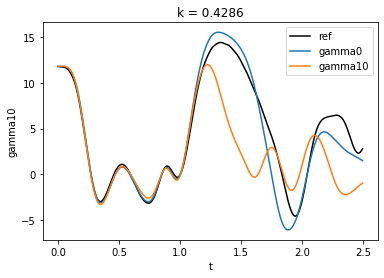

In [27]:
for model in ['ref', 'gamma0', 'gamma10']:
    color = 'k' if model=='ref' else None
    preds[model].isel(k=3, ens=49).plot(label=model, color=color)
plt.legend()

/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py

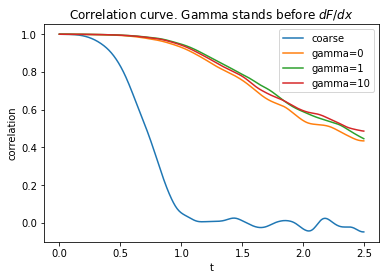

In [30]:
for model, label in zip(
    ['coarse', 'gamma0', 'gamma1', 'gamma10'],
    ['coarse', 'gamma=0', 'gamma=1', 'gamma=10']
    ):
    xr.corr(preds['ref'], preds[model], ['k', 'ens']).plot(label=label)
plt.legend()
plt.ylabel('correlation')
plt.title('Correlation curve. Gamma stands before $dF/dx$')
plt.savefig('correlation_gamma.pdf')